In [5]:
#coding: utf-8


import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from jqdata import *
from scipy import signal  
from scipy.fftpack import fft,ifft
from six import BytesIO


def filter_stock(codes,date):
    stock_list=[]
    for stock in codes:
        stock_info = get_security_info(stock)
        #print(stock)
        if stock_info.display_name != None:
            pause=get_price(stock,end_date=date, frequency='daily', fields='paused', fq='pre', count=2)['paused']
            #print(stock)
            #start_date=datetime.datetime.strptime(str(stock_info.start_date),'%Y-%m-%d')
            if 'ST' not in stock_info.name\
            and '*' not in stock_info.name\
            and '*' not in stock_info.display_name\
            and 'out' not in stock_info.display_name\
            and (date-stock_info.start_date) > datetime.timedelta(100)\
            and pause.values[0] != 1:
                stock_list.append(stock)
    return stock_list

def index_sum_cap(index,date):
    a=get_index_weights(index, date)
    stock_list=get_index_stocks(index,date)
    weight=np.array(a['weight'].values)
    #print(a)
    q=query(valuation.code, valuation.circulating_market_cap).filter(valuation.code.in_(stock_list))
    df = get_fundamentals(q, date)
    #print(len(weight),len(df['circulating_market_cap']),len(stock_list))
    if len(a) > 0:
        df['true_cap']=df['circulating_market_cap']*weight
        sum_cap=df['true_cap'].sum()/len(stock_list)
    else:
        sum_cap=df['circulating_market_cap'].sum()/len(stock_list)
    return sum_cap

In [14]:
start_date='2018-06-01'
end_date='2019-05-19'
trade_days=get_trade_days(start_date,end_date)
p=get_price('000300.XSHG',start_date,end_date,fields=['close','money'], frequency='daily', skip_paused=False,fq='pre')
p_close=p['close'].values
p_mon=p['money'].values
mon=[]
mon_s=[]
xticks=[]
for i in range(len(trade_days)):
    stock_list=get_index_stocks('000300.XSHG',trade_days[i])
    pct_all =get_price(stock_list,end_date=trade_days[i],fields=['pre_close','close','money'], count=1, frequency='daily', skip_paused=False,fq='pre')
    percent_yesterday_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']*100
    for i in range(len(percent_yesterday_df)):
        #print(percent_yesterday_df.ix[0,i])
        if percent_yesterday_df.ix[0,i] > 0:
            percent_yesterday_df.ix[0,i] = 1
        elif percent_yesterday_df.ix[0,i] == 0:
            percent_yesterday_df.ix[0,i] = 0
        else:
            percent_yesterday_df.ix[0,i] = -1
    money=(pct_all['money'].iloc[0,:]*percent_yesterday_df.iloc[0,:]).sum()
    mon.append(money)
    #mon_s.append(money/sum_cap)
    if i%15 == 0:
        xticks.append(trade_days[i])
zero=0*np.arange(len(trade_days))
x_num=range(0,len(trade_days),15)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprec

([<matplotlib.axis.XTick at 0x7f6184e094e0>,
 <a list of 16 Text xticklabel objects>)

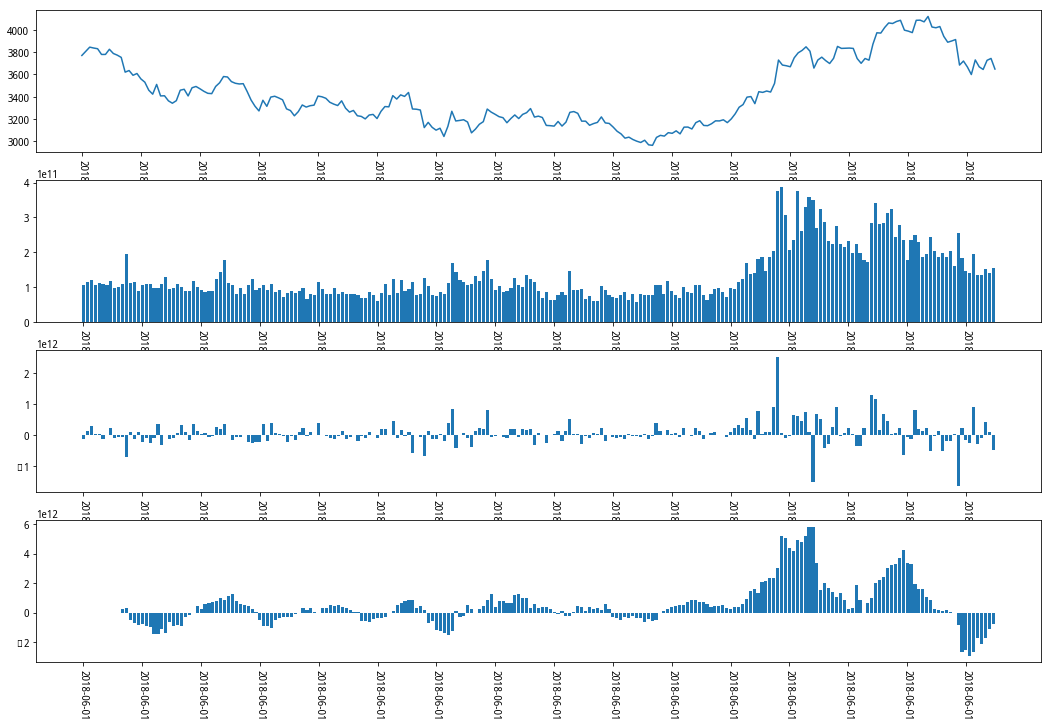

In [18]:
mon_10=[0]*10
mon_21=[0]*21
mon_42=[0]*42
mon_63=[0]*63
mon_125=[0]*125
for i in range(len(p_mon)):
    if i >=10:
        mon_10.append(sum(mon[i-10:i]))
    if i >=21:
        mon_21.append(sum(mon[i-21:i]))
    if i >=42:
        mon_42.append(sum(mon[i-42:i]))
    if i >=63:
        mon_63.append(sum(mon[i-63:i]))
    if i >=125:
        mon_125.append(sum(mon[i-125:i]))

fig= plt.figure(figsize=(18,12))
plt.subplot(411)
plt.plot(p_close)
plt.xticks( range(0,len(p_close),15),xticks,rotation = -90)
plt.subplot(412)
plt.bar(range(len(mon)),p_mon)
plt.xticks( range(0,len(p_close),15),xticks,rotation = -90)
plt.subplot(413)
plt.bar(range(len(mon)),mon)
plt.xticks( range(0,len(p_close),15),xticks,rotation = -90)
plt.subplot(414)
plt.bar(range(len(mon)),mon_21)
plt.xticks( range(0,len(p_close),15),xticks,rotation = -90)

In [4]:
data=pd.read_csv(BytesIO( read_file('df_index_hs300.csv')),index_col=[0])
mon=[]
for i in range(len(data.index)):
    stock_list=get_index_stocks('000300.XSHG',data.index[i])
    pct_all =get_price(stock_list,end_date=data.index[i],fields=['pre_close','close','money'], count=1, frequency='daily', skip_paused=False,fq='pre')
    percent_yesterday_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']*100
    for i in range(len(percent_yes_df)):
        if percent_yes_df[i] > 0:
            percent_yes_df[i] = 1
        elif percent_yes_df[i] == 0:
            percent_yes_df[i] = 0
        else:
            percent_yes_df[i] = -1
    money=(pct_all['money'].iloc[0,:]*percent_yesterday_df.iloc[0,:]).sum()
    mon.append(money)
    print(data.index[i])

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:87: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())


2005-06-01
2005-06-02
2005-06-03
2005-06-06
2005-06-07
2005-06-08
2005-06-09
2005-06-10
2005-06-13
2005-06-14
2005-06-15
2005-06-16
2005-06-17
2005-06-20
2005-06-21
2005-06-22
2005-06-23
2005-06-24
2005-06-27
2005-06-28
2005-06-29
2005-06-30
2005-07-01
2005-07-04
2005-07-05
2005-07-06
2005-07-07
2005-07-08
2005-07-11
2005-07-12
2005-07-13
2005-07-14
2005-07-15
2005-07-18
2005-07-19
2005-07-20
2005-07-21
2005-07-22
2005-07-25
2005-07-26
2005-07-27
2005-07-28
2005-07-29
2005-08-01
2005-08-02
2005-08-03
2005-08-04
2005-08-05
2005-08-08
2005-08-09
2005-08-10
2005-08-11
2005-08-12
2005-08-15
2005-08-16
2005-08-17
2005-08-18
2005-08-19
2005-08-22
2005-08-23
2005-08-24
2005-08-25
2005-08-26
2005-08-29
2005-08-30
2005-08-31
2005-09-01
2005-09-02
2005-09-05
2005-09-06
2005-09-07
2005-09-08
2005-09-09
2005-09-12
2005-09-13
2005-09-14
2005-09-15
2005-09-16
2005-09-19
2005-09-20
2005-09-21
2005-09-22
2005-09-23
2005-09-26
2005-09-27
2005-09-28
2005-09-29
2005-09-30
2005-10-10
2005-10-11
2005-10-12

In [ ]:
cap=[]
for i in range(len(trade_days)):
    a=get_index_weights('000300.XSHG', trade_days[i])
    stock_list=get_index_stocks('000300.XSHG',trade_days[i])
    weight=a['weight'].values
    q=query(valuation.code, valuation.circulating_market_cap).filter(valuation.code.in_(stock_list))
    df = get_fundamentals(q, trade_days[i])
    df['true_cap']=df['circulating_market_cap']*weight
    sum_cap=df['true_cap'].sum()
    cap.append(sum_cap)

In [ ]:
cap=[float(i) for i in cap]
cap=np.array(cap)
mon_s=cap/mon
x_num=range(0,len(trade_days),125)
pr=p.values
fig= plt.figure(figsize=(18,12))
plt.subplot(211)
plt.plot(pr)
plt.grid()
plt.xticks(x_num,xticks,rotation=-90)
plt.subplot(212)
plt.plot(mon_s,'ro')
plt.grid()
plt.xticks(x_num,xticks,rotation=-90)

In [ ]:
start_date='2010-01-01'
end_date='2019-05-05'
trade_days=get_trade_days(start_date,end_date)
mon=[]
p=get_price('000300.XSHG',start_date,end_date,fields=['close'], frequency='daily', skip_paused=False,fq='pre')['close']
for day in trade_days:
    
    pct_all = get_price(stock_list,end_date=day,fields=['pre_close','close','money'], count=1, frequency='daily', skip_paused=False,fq='pre')
    percent_yesterday_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']*100
    #percent_list = (percent_yesterday_df.iloc[0]).tolist()
    percent_yesterday_df=percent_yesterday_df.applymap(lambda x:1 if x>=0 else -1)
    #print(percent_yesterday_df)
    money=(pct_all['money'].iloc[0,:]*percent_yesterday_df.iloc[0,:]).sum()
    mon.append(money)
fig= plt.figure(figsize=(18,12))
plt.subplot(211)
plt.plot(p)
plt.subplot(212)
plt.plot(mon,'ro')

In [17]:
start_date='2018-10-01'
end_date='2019-05-14'
trade_days=get_trade_days(start_date,end_date)
p=get_price('000300.XSHG',start_date,end_date,fields=['close','volume','money'], frequency='daily', skip_paused=False,fq='pre')
p_vol=p['volume']
p_close=p['close']
vol_21=[0]*21
vol_42=[0]*42
vol_63=[0]*63
vol_125=[0]*125
for i in range(len(p_vol)):
    if i >=21:
        vol_21.append(p_vol[i-21:i].sum())
    if i >=42:
        vol_42.append(p_vol[i-42:i].sum())
    if i >=63:
        vol_63.append(p_vol[i-63:i].sum())
    if i >=125:
        vol_125.append(p_vol[i-125:i].sum())
        
x_tick=[]
xtick=[]
for i in range(len(p_vol)): 
    if i%10 == 0:
        x_tick.append(trade_days[i])
        xtick.append('')

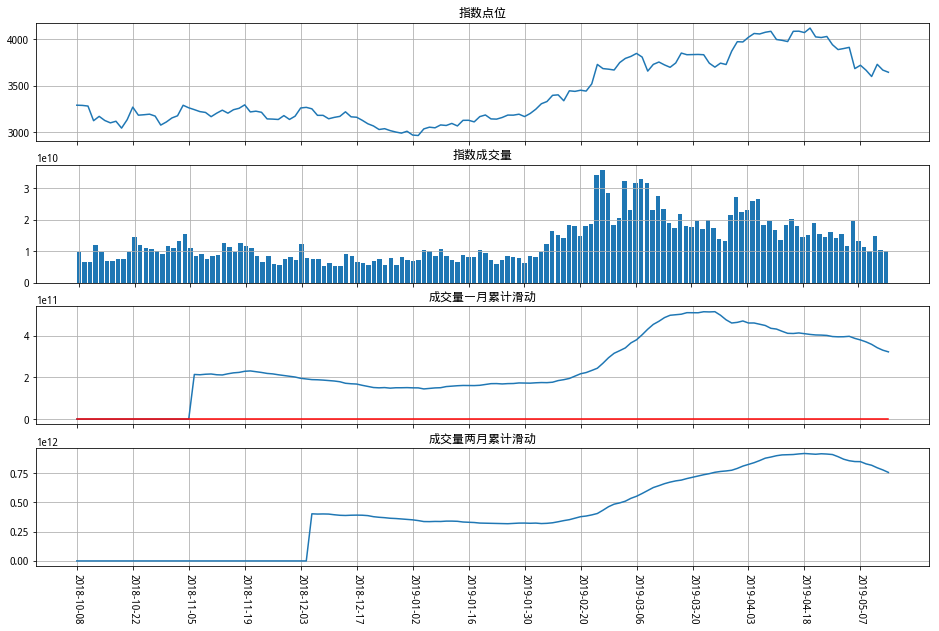

In [18]:
fig= plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(p_close.values)
plt.xticks(range(0,len(p_vol),10),xtick,rotation = -90)
plt.title('indexpercentile')
plt.grid()
plt.subplot(412)
plt.bar(np.arange(len(p_vol)),p_vol.values)
plt.xticks(range(0,len(p_vol),10),xtick,rotation = -90)
plt.title('volume')
plt.grid()
plt.subplot(413)
plt.plot(vol_21)
plt.plot([1]*len(p_vol),'r')
plt.xticks(range(0,len(p_vol),10),xtick,rotation = -90)
plt.title('volmoving1mon')
plt.grid()
plt.subplot(414)
plt.plot(vol_42)
plt.xticks( range(0,len(p_vol),10),x_tick,rotation = -90)
plt.title('volmoving2months')
plt.grid()